In [7]:
prices = {i+1:v for i,v in enumerate([1,5,8,9,10,17,17,20,24,30,40,-2,56,-6,25,-10,100,-23,200,-30])}

In [8]:
prices

{1: 1,
 2: 5,
 3: 8,
 4: 9,
 5: 10,
 6: 17,
 7: 17,
 8: 20,
 9: 24,
 10: 30,
 11: 40,
 12: -2,
 13: 56,
 14: -6,
 15: 25,
 16: -10,
 17: 100,
 18: -23,
 19: 200,
 20: -30}

In [9]:
prices[10]

30

In [17]:
cache = {}
def revenue_cache(r):
    if r in cache:
        return cache[r]
    
    r_optimal = max([prices[r]] + [(revenue_cache(i) + revenue_cache(r-1)) for i in range(1, r)])
    cache[r] = r_optimal
    return r_optimal

In [20]:
revenue_cache(20)

1310720

In [32]:
from functools import lru_cache

@lru_cache(maxsize=20)
def revenue_lru(r):
    return max([prices[r]] + [(revenue_lru(i) + revenue_lru(r-1)) for i in range(1, r)])

In [33]:
revenue_lru(20)

1310720

In [35]:
from functools import wraps

def memo(func):
    cache = {} 
    @wraps(func)
    def __wrap(*args, **kwargs):
        str_key = str(args) + str(kwargs)
        if str_key not in cache:
            result = func(*args, **kwargs)
            cache[str_key] = result
        return cache[str_key]
    return __wrap

In [37]:
@memo
def revenue_memo(r):
    return max([prices[r]] + [(revenue_memo(i) + revenue_memo(r-1)) for i in range(1, r)])

In [38]:
revenue_memo(20)

1310720

In [2]:
str1 = "nihao"
str1[:4]

'niha'

## Edit Distance

In [59]:
from functools import lru_cache

@lru_cache()
def get_edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    return min(
        [
        get_edit_distance(string1[:-1],string2) + 1,
        get_edit_distance(string1,string2[:-1]) + 1,
        get_edit_distance(string1[:-1],string2[:-1]) + (0 if string1[-1] ==  string2[-1] else 2)
        ]
    )

In [62]:
get_edit_distance('test1231345','taste1235123')

7

## Optional 自己尝试一下 VRP Prolem

In [63]:
import random
import matplotlib.pylab as plt

In [65]:
latitude = [random.randint(-100,100) for _ in range(20)]
longitude = [random.randint(-100,100) for _ in range(20)]

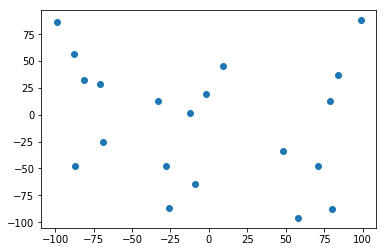

In [67]:
plt.scatter(latitude,longitude)

In [68]:
cars_number = 4